In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load and inspect loan data
df_loans = pd.read_csv('../data/loan_data.csv')
print(df_loans.shape)
df_loans.head()

(200, 40)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,...,0.00,0.00,171.62,16-Jan,0,INDIVIDUAL,0,NaN,NaN,NaN
1,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,...,117.08,1.11,119.66,13-Sep,0,INDIVIDUAL,0,NaN,NaN,NaN
2,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,...,0.00,0.00,649.91,16-Jan,0,INDIVIDUAL,0,NaN,NaN,NaN
3,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,...,0.00,0.00,357.48,15-Jan,0,INDIVIDUAL,0,NaN,NaN,NaN
4,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,...,0.00,0.00,67.79,16-Jan,0,INDIVIDUAL,0,NaN,NaN,NaN


In [3]:
# load and inspect home ownership data
df_home = pd.read_csv('../data/home_ownership_data.csv')
print(df_home.shape)
df_home.head()

(200, 2)


,member_id,home_ownership
0,1030901,MORTGAGE
1,1247741,MORTGAGE
2,1261745,MORTGAGE
3,1264291,RENT
4,1269083,RENT


In [4]:
# join dataframes on member_id and inspect
df_all = df_loans.merge(df_home, how='inner', on='member_id')
print(df_all.shape)
df_all.head()

(200, 41)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,home_ownership
0,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,...,0.00,171.62,16-Jan,0,INDIVIDUAL,0,NaN,NaN,NaN,RENT
1,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,...,1.11,119.66,13-Sep,0,INDIVIDUAL,0,NaN,NaN,NaN,RENT
2,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,...,0.00,649.91,16-Jan,0,INDIVIDUAL,0,NaN,NaN,NaN,RENT
3,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,...,0.00,357.48,15-Jan,0,INDIVIDUAL,0,NaN,NaN,NaN,RENT
4,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,...,0.00,67.79,16-Jan,0,INDIVIDUAL,0,NaN,NaN,NaN,RENT


In [5]:
# compute average loan amount for each home ownership status
df_avg = df_all.groupby('home_ownership').mean()['loan_amnt'].reset_index()
df_avg.head()

,home_ownership,loan_amnt
0,MORTGAGE,13502.830189
1,OWN,9603.571429
2,RENT,11067.481203


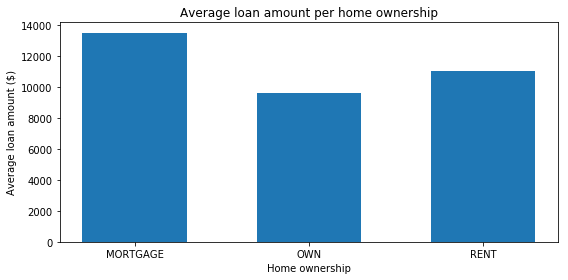

In [6]:
# start figure
fig, ax = plt.subplots(figsize=(8, 4))

labels = df_avg['home_ownership'].unique()
x = np.arange(len(labels))
height = df_avg['loan_amnt']

# plot
ax.bar(x, height, width=0.6)

# add x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(labels)

# add titles
ax.set_xlabel('Home ownership')
ax.set_ylabel('Average loan amount ($)')
ax.set_title('Average loan amount per home ownership')

fig.tight_layout()

# save figure
# fig.savefig('avg_loan_per_home_ownership.png', dpi=150)